In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

In [12]:
path = Path("build/benchmarks/results")

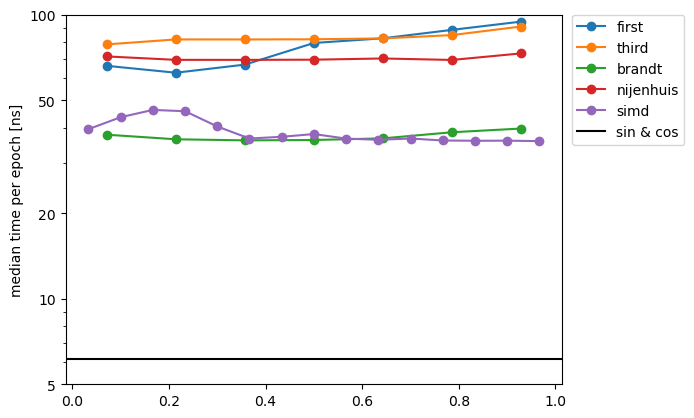

In [14]:
def make_plot_for_path(path):
    baseline = pd.read_csv(path / "baseline.csv")
    mean_baseline = np.median(baseline.time_ns) / np.median(baseline.iterations)

    for name in [
        "first", "third",
        "brandt", # "brandt_fixed",
        "nijenhuis", 
        "simd",
        # "contour8", "contour8_fixed", "contour16_fixed", "first", "third",
    ]:
        df = pd.read_csv(path / f"{name}.csv")
        if name == "simd":
            df_ecc = df
        else:
            df_ecc = df.groupby(level=0).mean()
        plt.plot(df_ecc.eccentricity, df_ecc.time_ns.astype(np.float64) / df_ecc.iterations, "o-", label=name.replace("_fixed", " (const. ecc.)"))
        
    plt.axhline(mean_baseline, color="k", label="sin & cos")
    plt.yscale("log")
    plt.ylim(5, 100)
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)
    plt.ylabel("median time per epoch [ns]")

    plt.yticks([5, 10, 20, 50, 100])
    plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# plt.savefig("comparison.pdf", bbox_inches="tight")

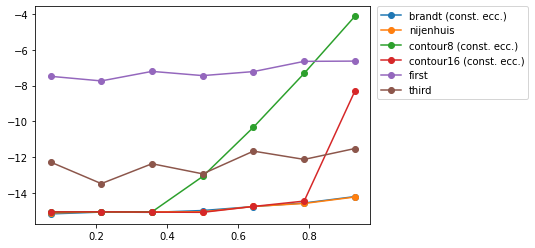

In [29]:
for name in ["brandt_fixed", "nijenhuis", "contour8_fixed", "contour16_fixed", "first", "third"]:
    df = pd.read_csv(f"build/benchmarks/results/{name}.csv")
    df_ecc = df.max(level=0)
    plt.plot(df_ecc.eccentricity, np.log10(df_ecc.error_sin), "o-", label=name.replace("_fixed", " (const. ecc.)"))
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)